### See LTspice circuit "MatrixSolnExpt.asc" for a test circuit which implements this.  It can be used to compare to the results below.

In [1]:
import numpy as np
import numpy.linalg as la
from IPython.display import Image

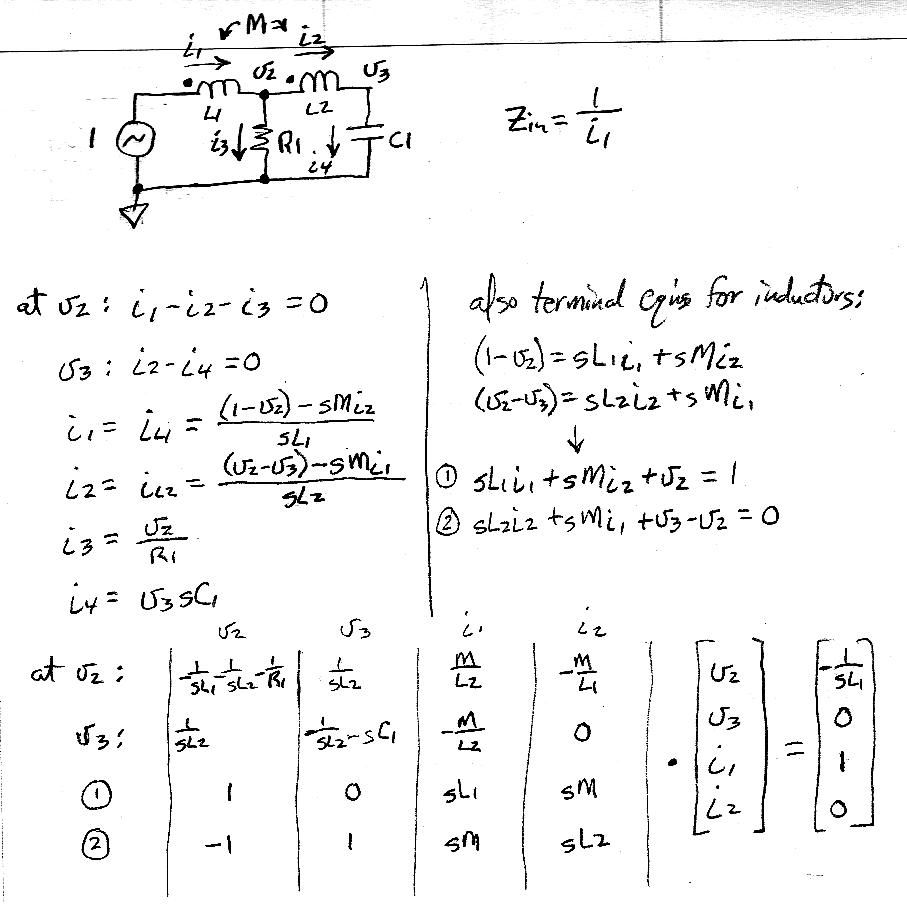

In [2]:
# Original sketch of test circuit, node equations, and coupled inductor
# terminal equations.  Equation matrix sketch is shown at bottom.

Image("MatrixSolnExpt.png", width=600)

In [3]:
# Define test component values and frequency
L1 = 120e-6
L2 = 100e-6
M  = 60e-6
C1 = 1e-9
R1 = 1e3

w = 2*np.pi*3.8e6
s = 1j*w

In [4]:
# Coefficient matrix from figure above. Four rows correspond to 
# two equations for nodes v2 and v3 and two terminal equations for
# coupled inductor currents.
A = np.array([
    [-1/(s*L1) - 1/(s*L2) - 1/R1, 1/(s*L2)        , M/L2 , -M/L1],
    [1/(s*L2)                   , -1/(s*L2) - s*C1, -M/L2, 0    ],
    [1                          , 0               , s*L1 , s*M  ],
    [-1                         , 1               , s*M  , s*L2 ]
])

In [5]:
# Output matrix (far right column matrix in sketch above)
B = np.array([
    [-1/(s*L1)],
    [0],
    [1],
    [0]
])

In [6]:
# Variable names to correspond with sketch and schematic
vars = ["v2", "v3", "i1", "i2"]

In [7]:
# Using the linear algebra solver, print raw and mag/phase results for the four variables.
# Note that phase here is 180 degrees from the LTspice phase for this circuit since LTspice
# assumes positive current comes OUT of dotted terminals.
x = la.solve(A, B)
print("{0}\n".format(x))
for elem, var in zip(x, vars):
    vec = elem[0]
    print("{0} = {1:.4e} at {2:6.4} deg".format(var, np.abs(vec), np.angle(vec, deg=True)))

[[  3.50660081e-01 -2.02709770e-01j]
 [ -6.68044354e-04 +7.81561081e-03j]
 [  1.64053743e-04 -2.18660066e-04j]
 [ -1.86606338e-04 -1.59502966e-05j]]

v2 = 4.0504e-01 at -30.03 deg
v3 = 7.8441e-03 at  94.89 deg
i1 = 2.7336e-04 at -53.12 deg
i2 = 1.8729e-04 at -175.1 deg


In [8]:
# Check that solution is correct, and calculate k (for LTspice) from L and M
print("allclose = {0}".format(np.allclose(np.dot(A, x), B)))
print("k = {0:.4f}".format(M/np.sqrt(L1*L2)))

allclose = True
k = 0.5477
